## Importing modules

In [272]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from datetime import date as dt
from sklearn.feature_extraction import DictVectorizer
from collections import Counter
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
from scipy import stats

## Selecting file within the same directory

In [102]:
file = "data_full.csv"

In [104]:
df = pd.read_csv(file, encoding ='utf8')
print(df)

    num     msttr  ari   fg     fe  words  comm
0   102  0.705500  6.2  3.7  86.50   1494    10
1   107  0.701875  6.2  4.8  83.76   3469     8
2   106  0.710899  9.2  7.3  77.16   7559    21
3   107  0.710899  9.2  7.3  77.16   7559    21
4   124  0.701765  9.8  6.7  78.89   1465     0
..  ...       ...  ...  ...    ...    ...   ...
95  120  0.726429  9.7  8.7  73.61   1201    42
96  120  0.726429  9.7  8.7  73.61   2875    42
97  120  0.726429  9.7  8.7  73.61   1201     0
98  120  0.726429  9.7  8.7  73.61   2875     0
99  118  0.706034  8.2  6.2  80.01   4655     2

[100 rows x 7 columns]


# 2 Scatterplots

## 2.1 Scatterplot MSTTR

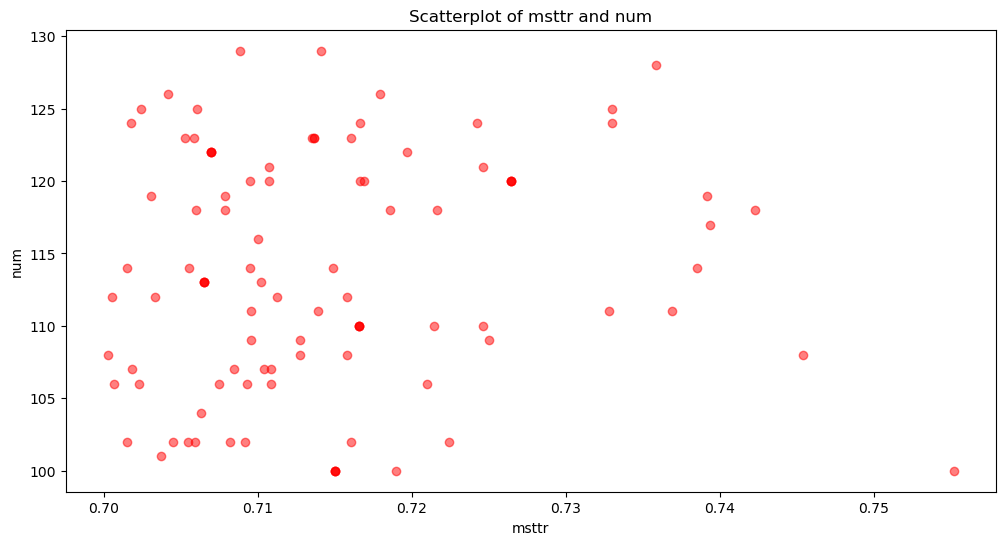

In [108]:
y_column = "num"

x_column1 = "msttr"  

plt.figure(figsize=(12, 6))
plt.scatter(df[x_column1],df[y_column], alpha = 0.5, color='red') 
plt.xlabel(x_column1)
plt.ylabel(y_column)
plt.title(f'Scatterplot of {x_column1} and {y_column}')
plt.show()

## 2.2 Scatterplot ARI

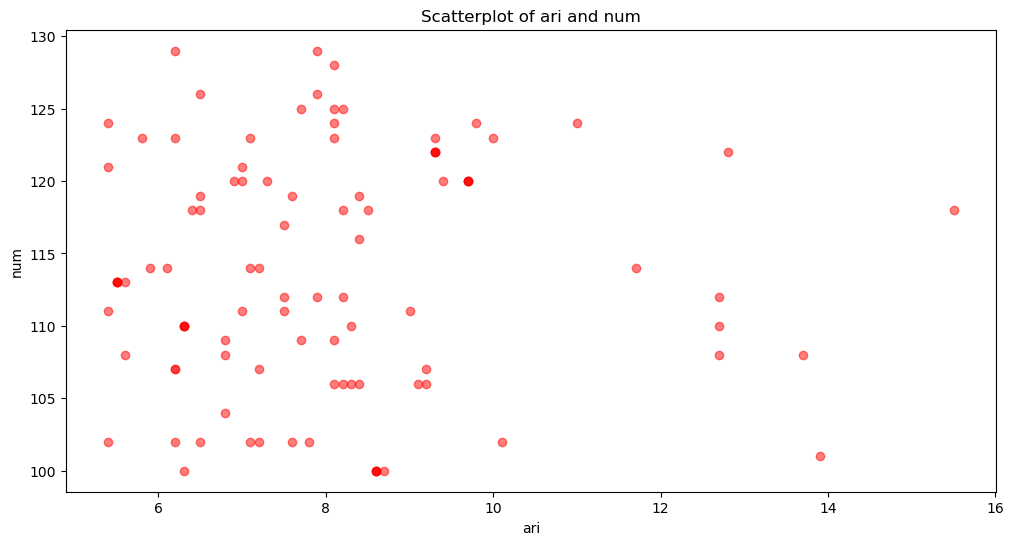

In [113]:
x_column2 = "ari"  

plt.figure(figsize=(12, 6))
plt.scatter(df[x_column2],df[y_column], alpha = 0.5, color='red') 
plt.xlabel(x_column2)
plt.ylabel(y_column)
plt.title(f'Scatterplot of {x_column2} and {y_column}')
plt.show()

## 2.3 Scatterplot FG

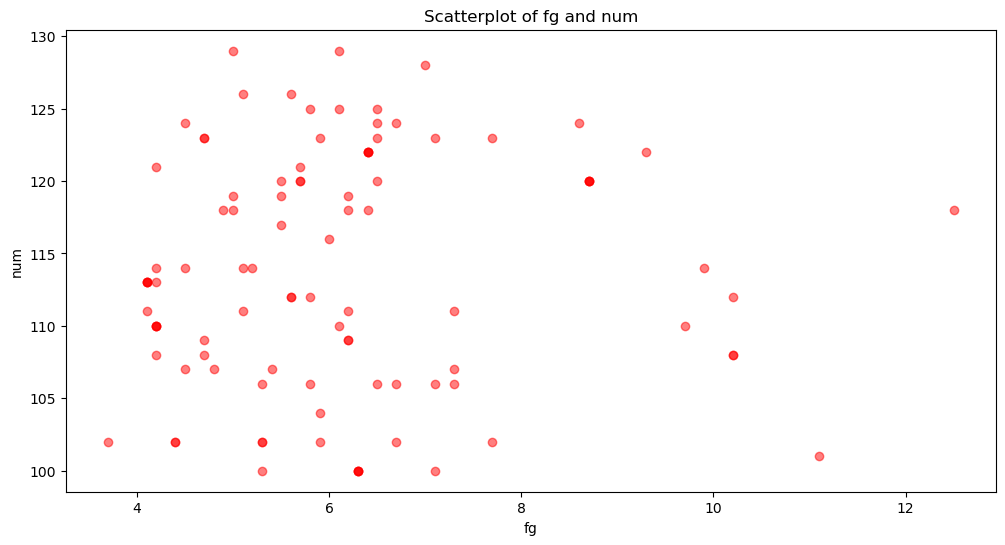

In [115]:
x_column3 = "fg"  

plt.figure(figsize=(12, 6))
plt.scatter(df[x_column3],df[y_column], alpha = 0.5, color='red') 
plt.xlabel(x_column3)
plt.ylabel(y_column)
plt.title(f'Scatterplot of {x_column3} and {y_column}')
plt.show()

## 2.4 Scatterplot FE

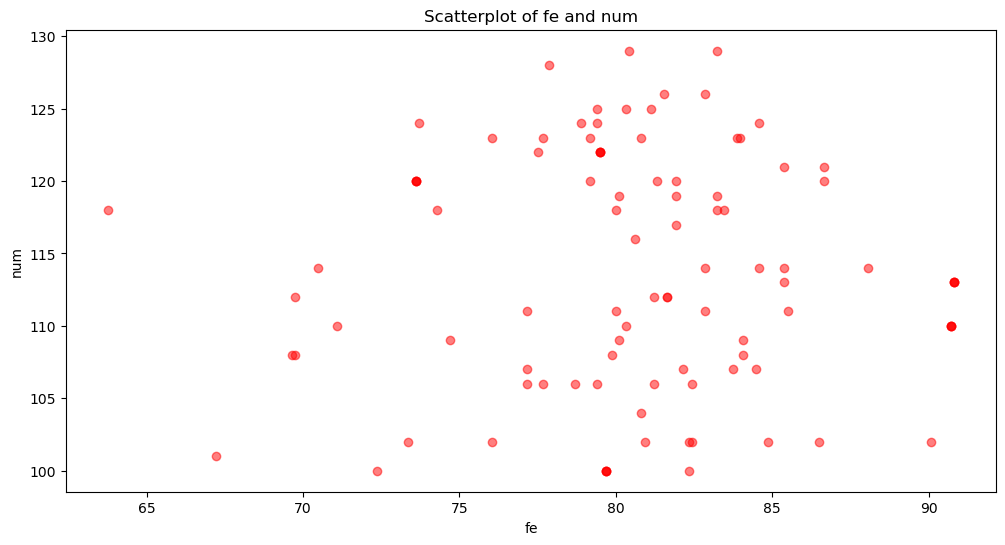

In [117]:
x_column4 = "fe"  

plt.figure(figsize=(12, 6))
plt.scatter(df[x_column4],df[y_column], alpha = 0.5, color='red') 
plt.xlabel(x_column4)
plt.ylabel(y_column)
plt.title(f'Scatterplot of {x_column4} and {y_column}')
plt.show()

## 2.5 Scatterplot Words

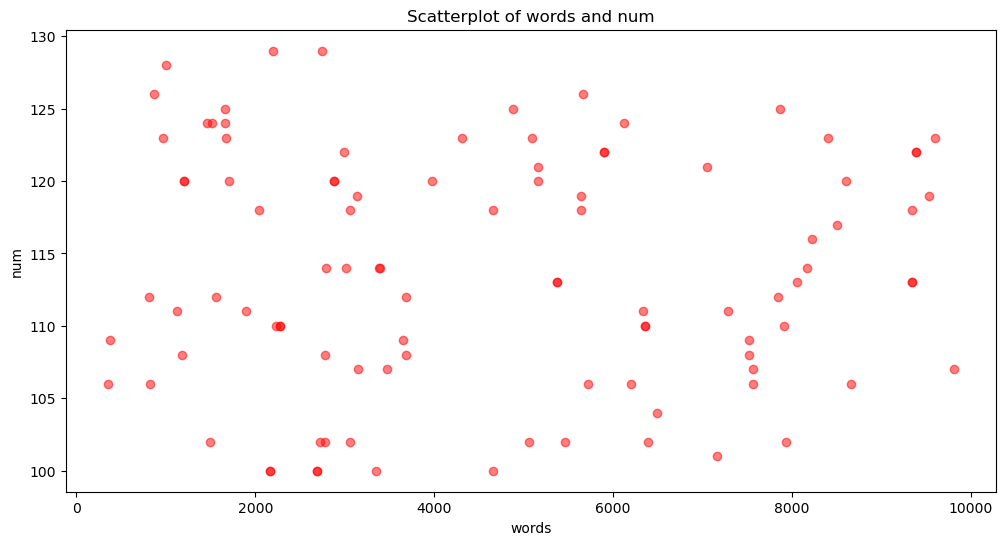

In [119]:
x_column5 = "words"  

plt.figure(figsize=(12, 6))
plt.scatter(df[x_column5],df[y_column], alpha = 0.5, color='red') 
plt.xlabel(x_column5)
plt.ylabel(y_column)
plt.title(f'Scatterplot of {x_column5} and {y_column}')
plt.show()

## 2.6 Scatterplot Comments

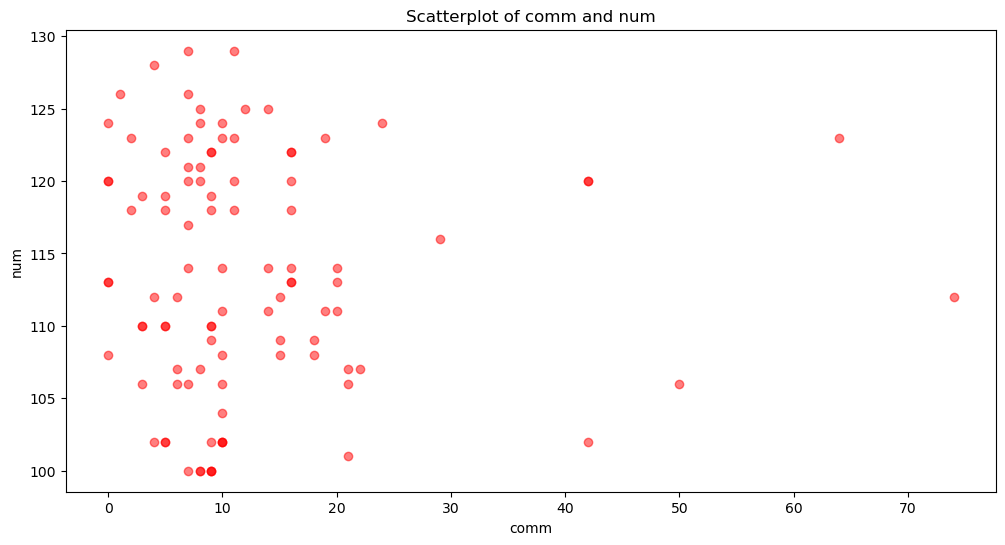

In [123]:
x_column6 = "comm"  

plt.figure(figsize=(12, 6))
plt.scatter(df[x_column6],df[y_column], alpha = 0.5, color='red') 
plt.xlabel(x_column6)
plt.ylabel(y_column)
plt.title(f'Scatterplot of {x_column6} and {y_column}')
plt.show()

# 3. Performing Simple Linear Regression

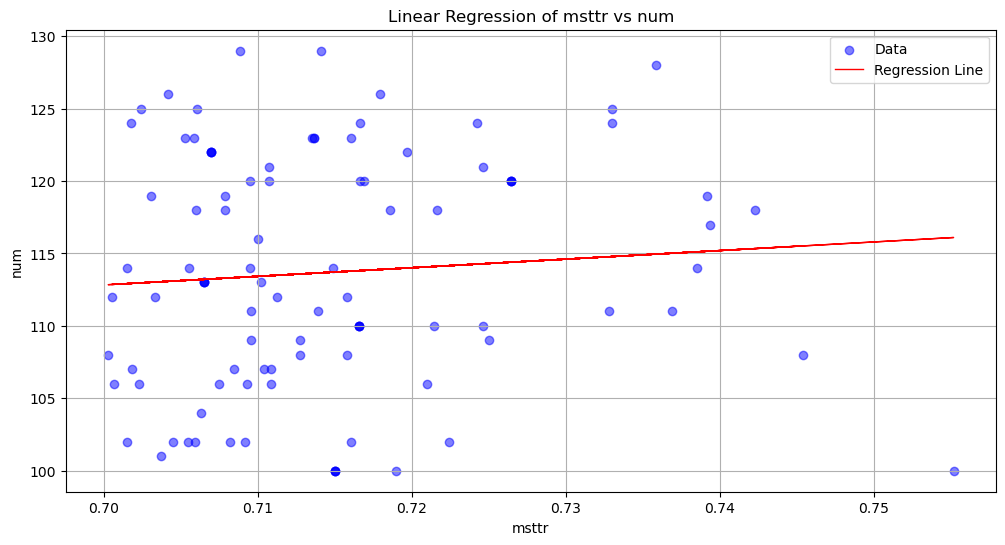

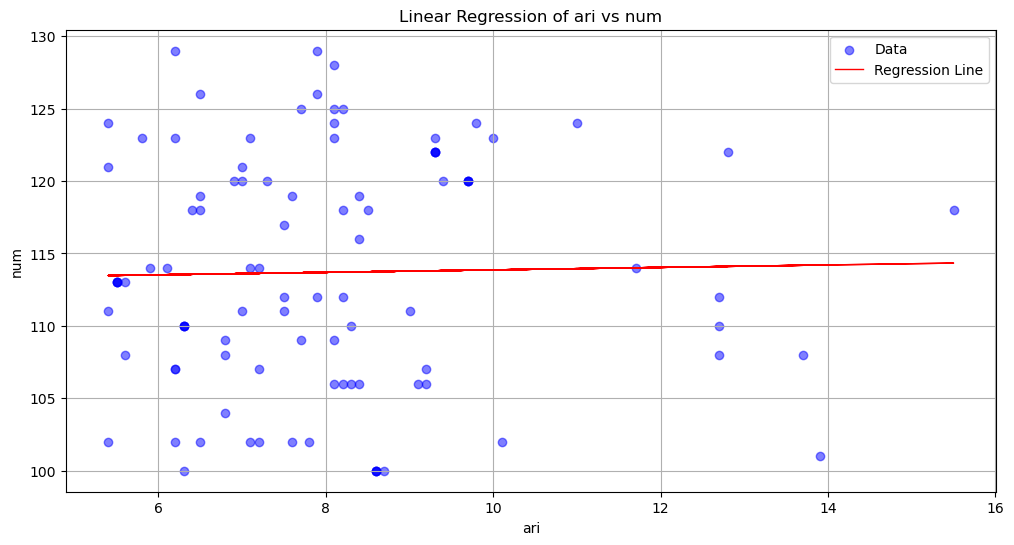

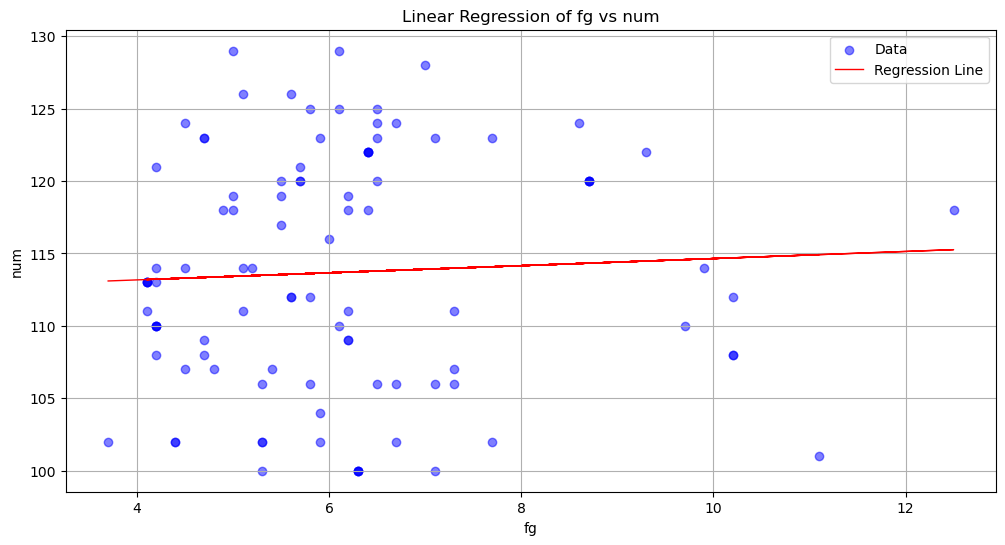

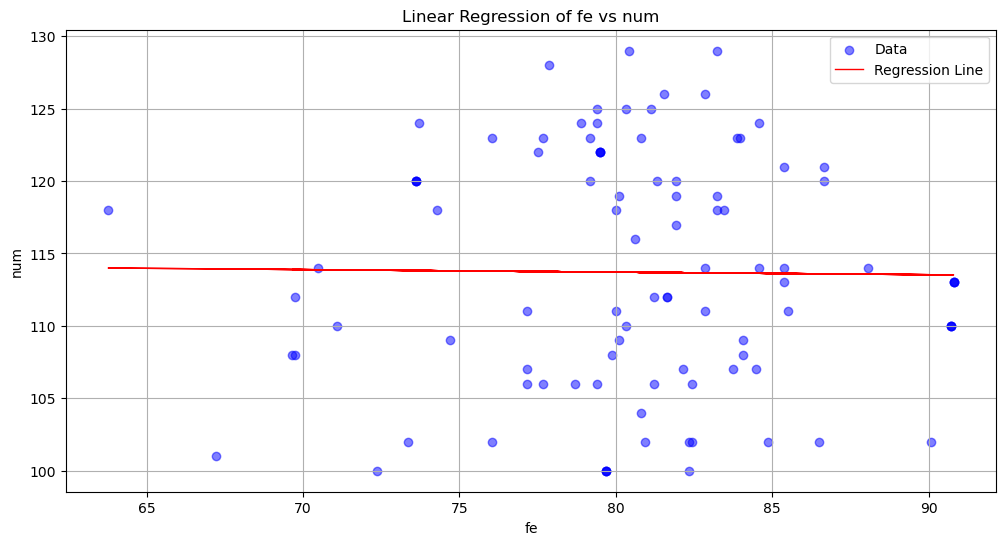

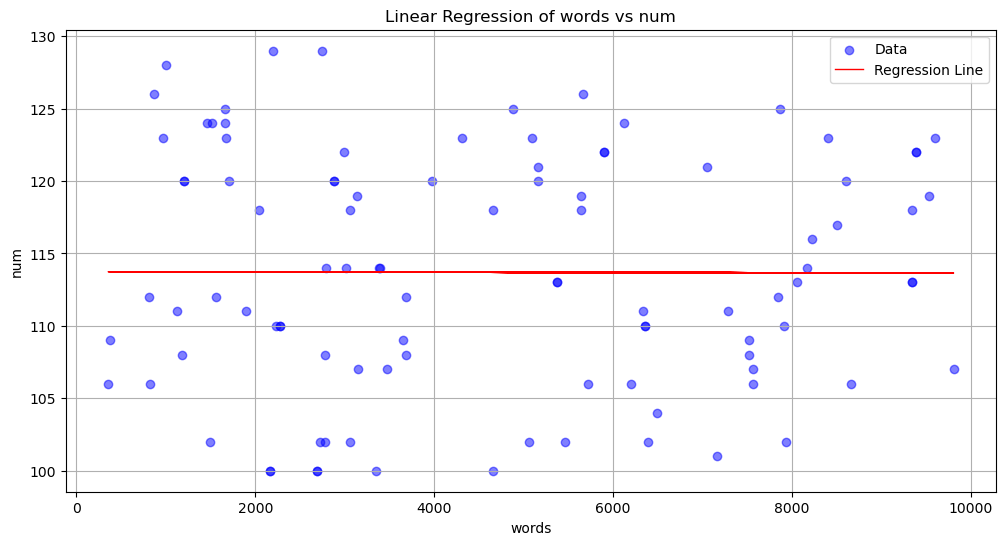

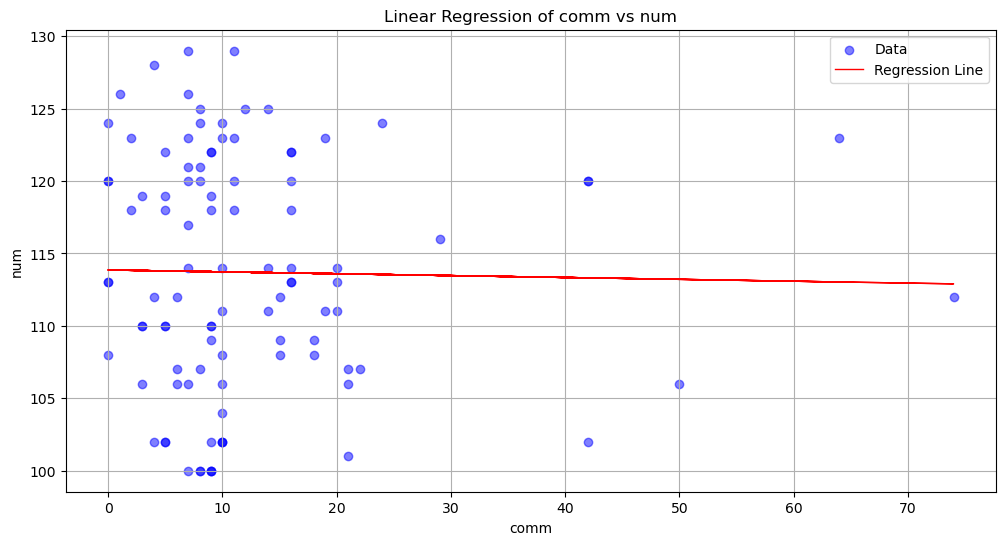

In [143]:
ind_variables = ['msttr', 'ari', 'fg', 'fe', 'words', 'comm']
lr = LinearRegression()

for x_column in ind_variables:
    df_clean = df[[x_column, y_column]].dropna()
    X = df_clean[x_column].values.reshape(-1, 1)
    Y = df_clean[y_column].values

    lr.fit(X, Y)
    y_prediction = lr.predict(X)

    plt.figure(figsize=(12, 6))
    plt.scatter(X, Y, alpha=0.5, color = 'blue', label = "Data")
    plt.plot(X, y_prediction, linewidth = 1, color='red', label = 'Regression Line') 
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(f'Linear Regression of {x_column} vs {y_column}')
    plt.legend()
    plt.grid(True)
    plt.show()

# 4. Function of the intercept and slope of linear function

In [240]:
def intercept_slope(df, x_column, y_column):
    df_clean = df[[x_column, y_column]].dropna()

    lr = LinearRegression()
    
    X = df_clean[x_column].values.reshape(-1, 1)
    Y = df_clean[y_column].values

    lr.fit(X, Y)
    intercept = lr.intercept_
    slope = lr.coef_[0]

    print(f"{x_column}: Slope = {round(slope, 2)}, Intercept = {round(intercept, 2)}")

    x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_prediction = intercept + slope * x_range
    
    plt.figure(figsize=(12, 6))
    plt.scatter(X, Y, alpha=0.5, color = 'blue', label = "Data")
    plt.plot(x_range, y_prediction, linewidth = 1, color='red', label = f"Y = {round(intercept,2)} + {round(slope,2)}X")
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(f'Regression Function of {x_column} vs {y_column}')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return 
    

msttr: Slope = 59.36, Intercept = 71.27


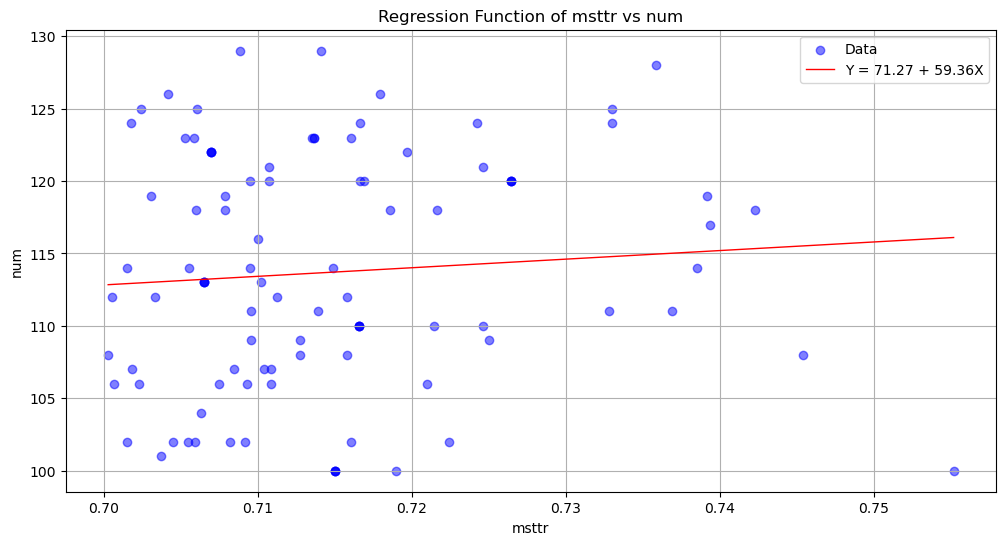

In [242]:
intercept_slope(df,'msttr',y_column)

ari: Slope = 0.09, Intercept = 113.02


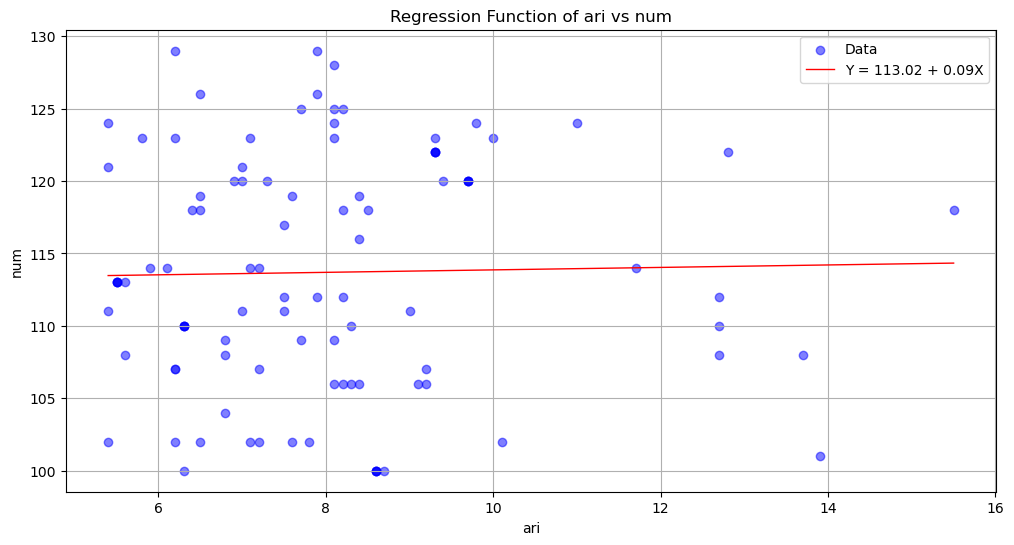

In [244]:
intercept_slope(df,'ari',y_column)

fg: Slope = 0.25, Intercept = 112.19


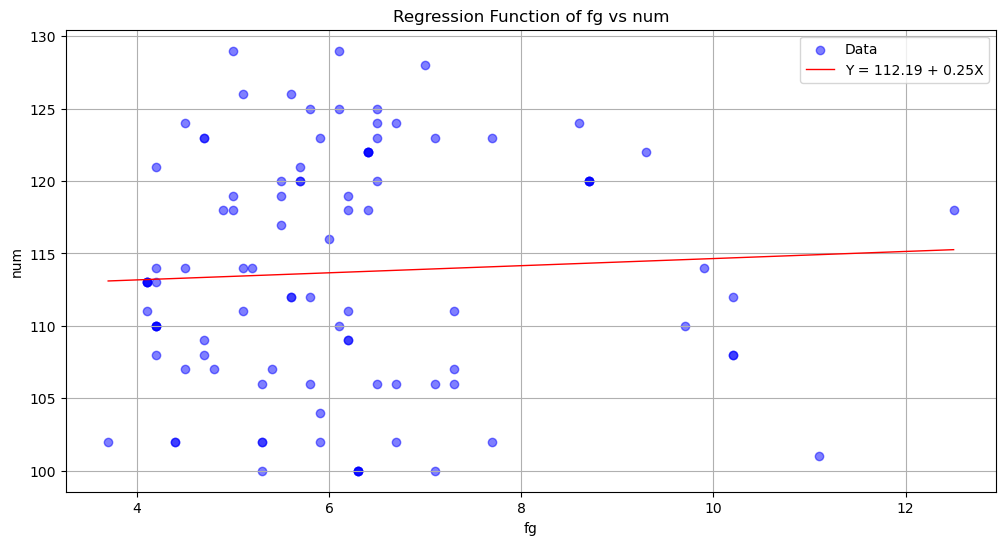

In [246]:
intercept_slope(df,'fg',y_column)

fe: Slope = -0.02, Intercept = 115.12


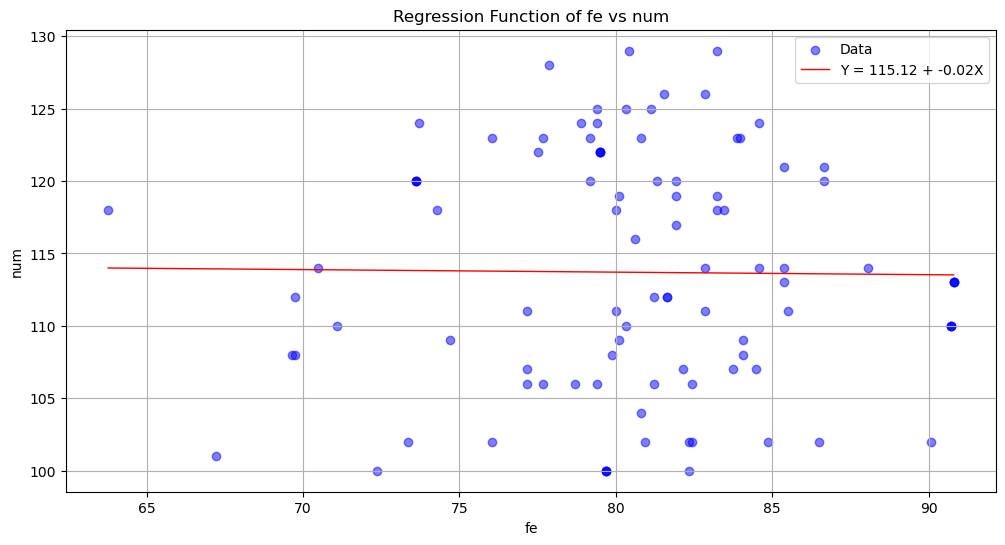

In [248]:
intercept_slope(df,'fe',y_column)

words: Slope = -0.0, Intercept = 113.74


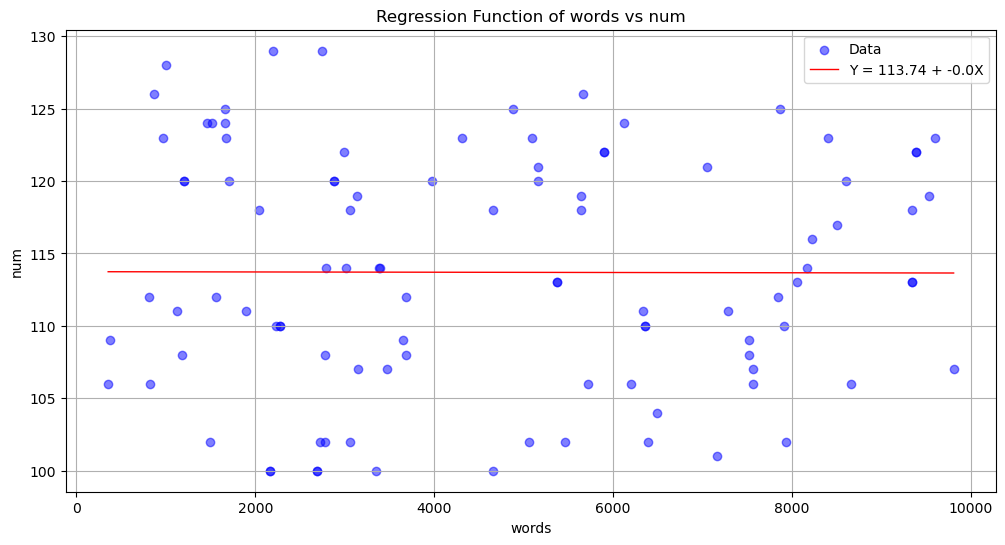

In [250]:
intercept_slope(df,'words',y_column)

comm: Slope = -0.01, Intercept = 113.86


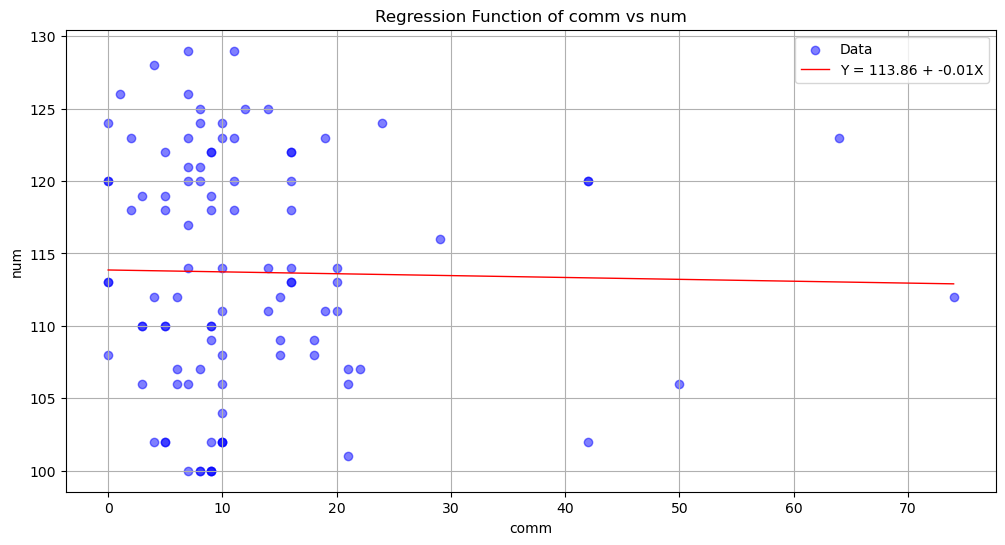

In [251]:
intercept_slope(df,'comm',y_column)

# 5. Calculating the R2 score

In [255]:
r2_results = {}

for x_column in ind_variables:
    df_clean = df[[x_column, y_column]].dropna()
    X = df_clean[x_column].values.reshape(-1, 1)
    Y = df_clean[y_column].values
    lr.fit(X, Y)
    y_prediction = lr.predict(X)
    
    r2 = r2_score(Y, y_prediction)

    r2_results[x_column] = round(r2, 3)

    print(f'R2 Score for {x_column}: {round(r2, 3)}')

R2 Score for msttr: 0.007
R2 Score for ari: 0.0
R2 Score for fg: 0.003
R2 Score for fe: 0.0
R2 Score for words: 0.0
R2 Score for comm: 0.0


# 6. Plotting residuals

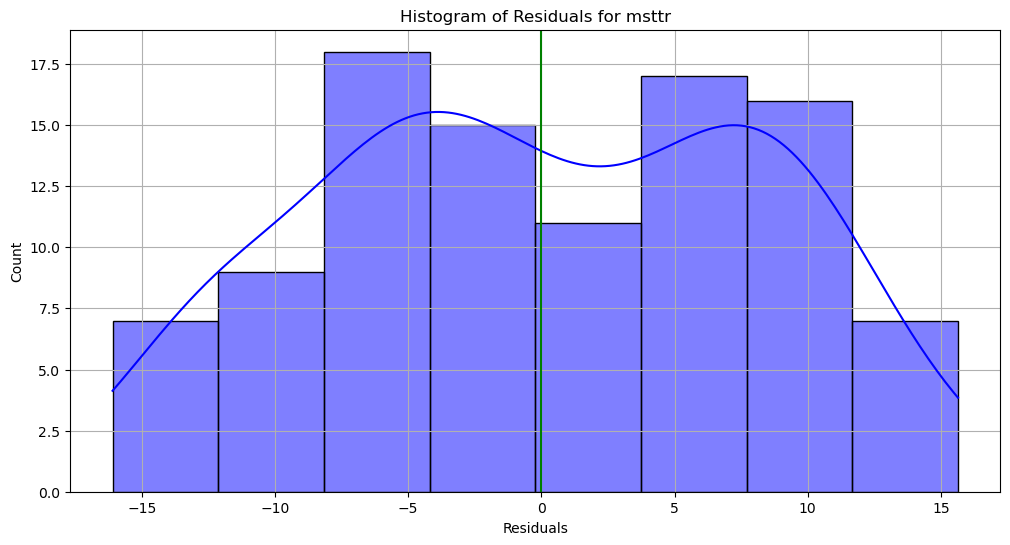

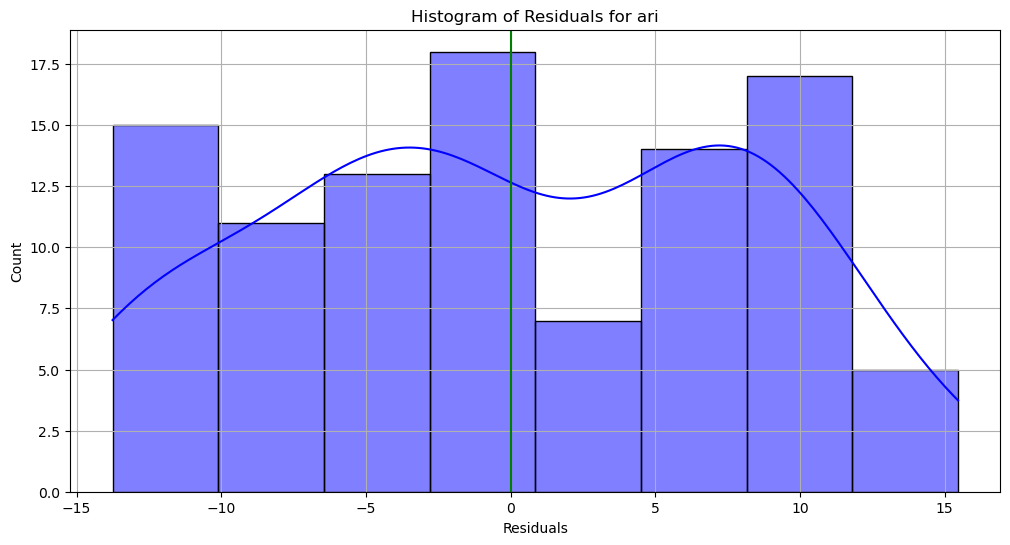

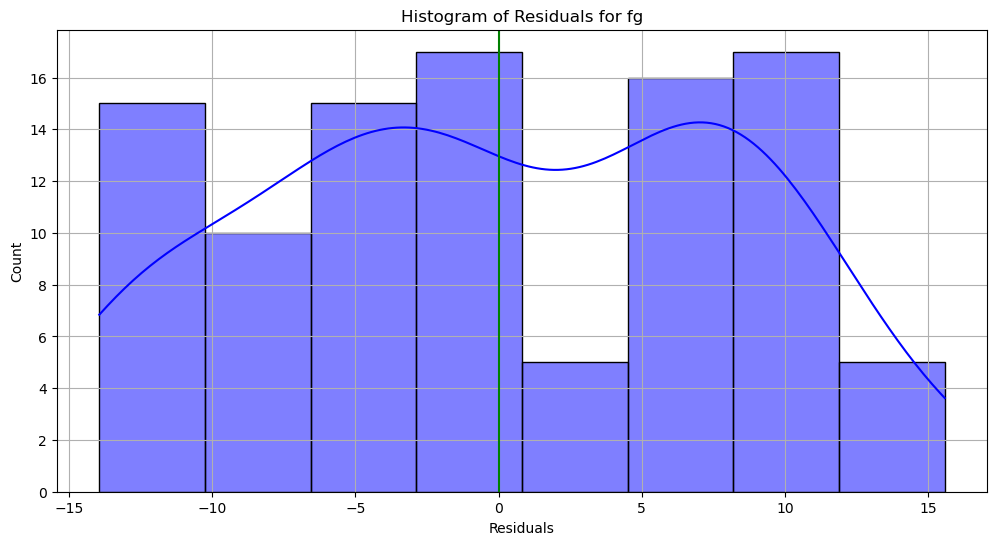

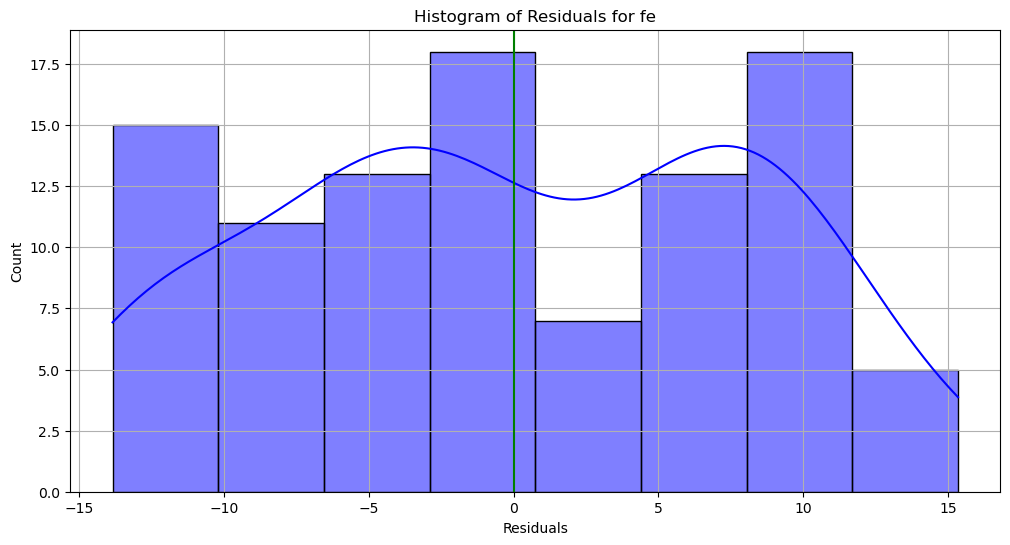

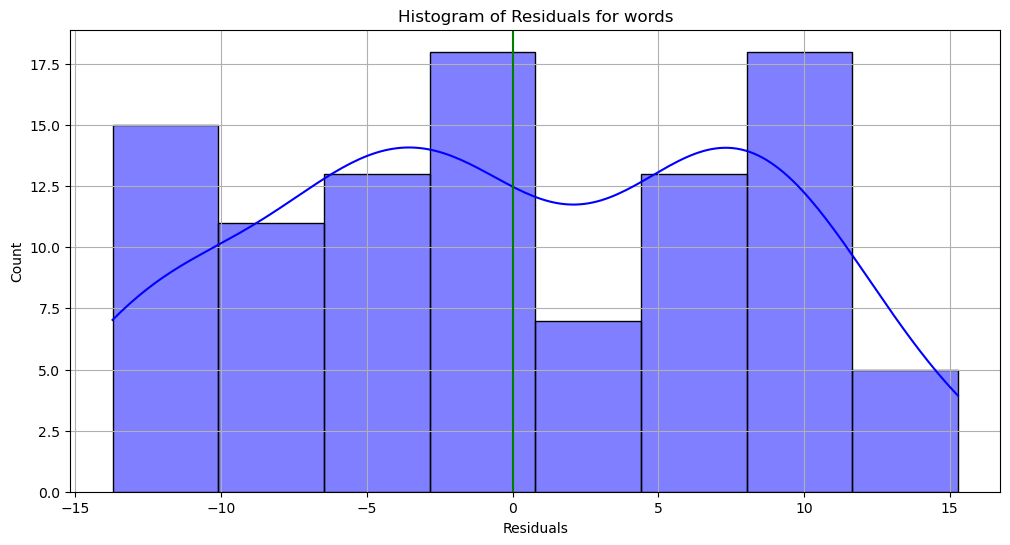

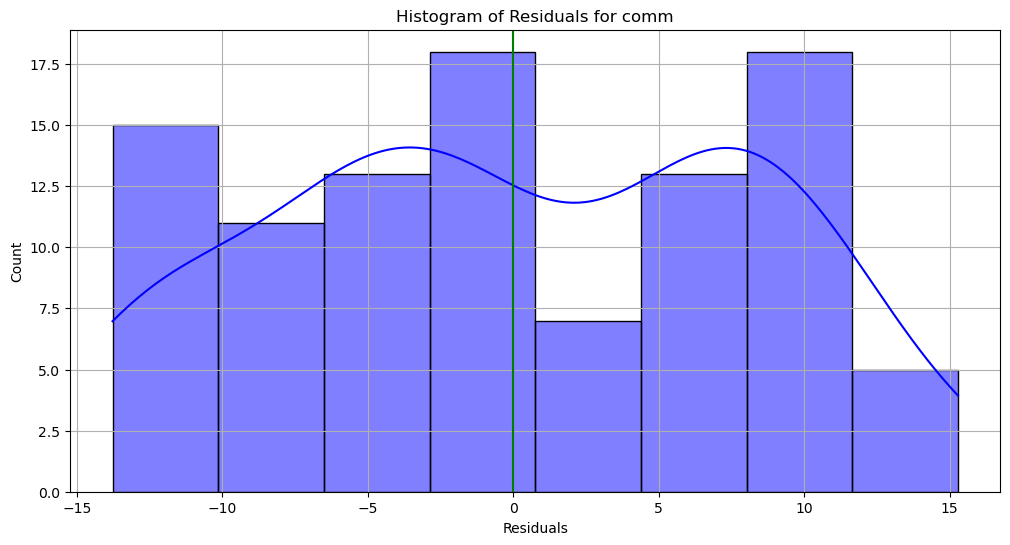

In [269]:
for x_column in ind_variables:
    df_clean = df[[x_column, y_column]].dropna()
    X = df_clean[x_column].values.reshape(-1, 1)
    Y = df_clean[y_column].values
    lr.fit(X, Y)
    y_prediction = lr.predict(X)
    residuals = Y - y_prediction

    plt.figure(figsize=(12, 6))
    sns.histplot(residuals, kde = True, alpha=0.5, color = 'blue')
    plt.axvline(x = 0, color = 'green')
    plt.xlabel('Residuals')
    plt.ylabel('Count')
    plt.title(f'Histogram of Residuals for {x_column}')
    plt.grid(True)
    plt.show()

# 7. Shapiro-Wilk test

In [284]:
shapiro_test = stats.shapiro(residuals)
print(shapiro_test)

ShapiroResult(statistic=np.float64(0.9547842789965134), pvalue=np.float64(0.0017379414425812596))


In [286]:
shapiro_results = {}

for x_column in ind_variables:
    df_clean = df[[x_column, y_column]].dropna()
    X = df_clean[x_column].values.reshape(-1, 1)
    Y = df_clean[y_column].values
    lr.fit(X, Y)
    y_prediction = lr.predict(X)
    residuals = Y - y_prediction

    shapiro_test = stats.shapiro(residuals)
    statistic, p_value = shapiro_test

    print(f'Shapiro-Wilk test for {x_column}: Statistic = {round(statistic, 4)}, p_value = {round(p_value, 4)}')

Shapiro-Wilk test for msttr: Statistic = 0.9642, p_value = 0.0081
Shapiro-Wilk test for ari: Statistic = 0.9561, p_value = 0.0022
Shapiro-Wilk test for fg: Statistic = 0.9591, p_value = 0.0035
Shapiro-Wilk test for fe: Statistic = 0.9553, p_value = 0.0019
Shapiro-Wilk test for words: Statistic = 0.9539, p_value = 0.0015
Shapiro-Wilk test for comm: Statistic = 0.9548, p_value = 0.0017
